In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Any results you write to the current directory are saved as output.
'''

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n\n# Any results you write to the current directory are saved as output.\n"

In [5]:
train = pd.read_csv("~/Downloads/ML Practice/Logistic-Regression/titanic_train.csv")

In [6]:
#Checking number of NAN from Info
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


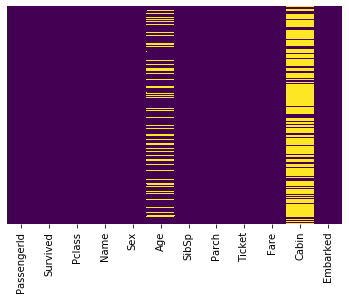

In [7]:
# Exploratory Data analysis

#Checking number of Nan values from heatmap
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

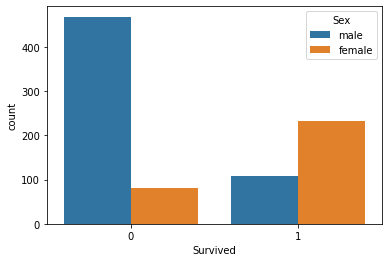

In [8]:
#Checking number of survived
#Blue represents not survived and 1 represents survived

sns.countplot(x = 'Survived', hue='Sex', data=train)

#We can see that men are the most among people who didnt survive and Female are the most among people who survived

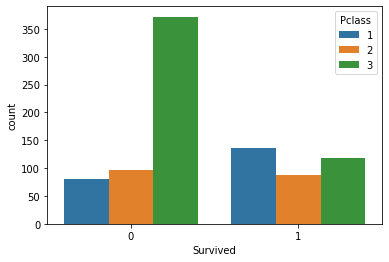

In [9]:
#To check the relation between people who survived and there class

sns.countplot(x='Survived', hue='Pclass',data=train)

#We can see that the people who didnt survive most belong to 3rd Class. 
#3rd class had the cheapest ticket price

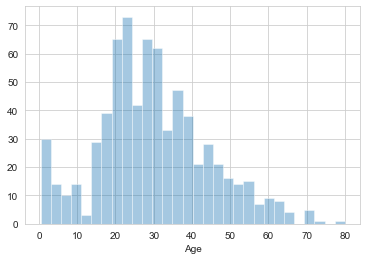

In [10]:
#To check for distribution of Age.
#PLotting distplot

#for getting the background grid lines 
sns.set_style('whitegrid')

#Plotting the graph
#kde draws the curved line around the plots 
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

#Many passengers around 20-30 years

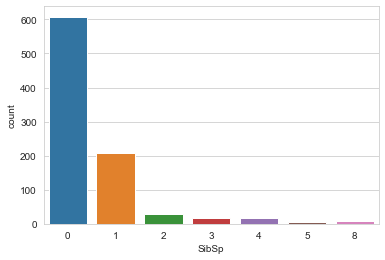

In [11]:
#Analysing the next column to see if i can find any info.
#SibSp
#To check how many siblings people onboard had

sns.countplot(x='SibSp',data=train)

#From the plot we can see that most people had no siblings.

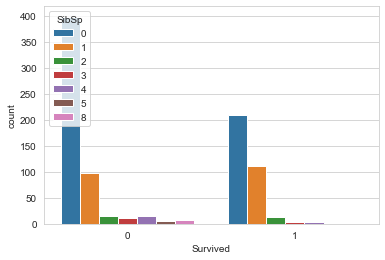

In [12]:
#To check if people who had siblings and Spouse had any effect on survival

sns.countplot(x='Survived',hue='SibSp',data=train)


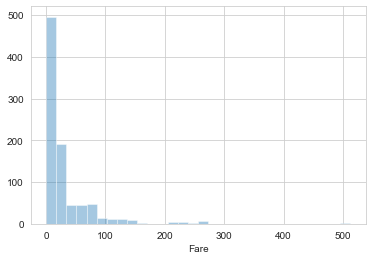

In [13]:
#Exploring the Fare column

#Plotting the graph

sns.distplot(train['Fare'],kde=False,bins=30)

#As we alreaddy know most people were in 3rd class hence the price paid is also less for them.

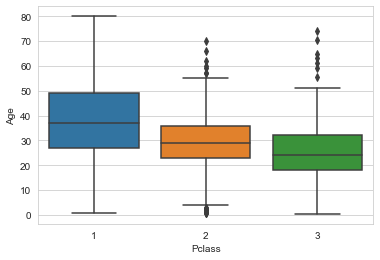

In [14]:
#Filling and dropping missing data

#Fill the age by the mean of the class they belong to.

#Checking for avg value of each type of class

sns.boxplot(x='Pclass',y='Age',data=train)


In [15]:
#Replacing the missing values in each class by avg value of the class

#Defining function to add avg age in place of missing value

#Sending Age. If age is null return the avg. If age is not null then return avg age.

def adding_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        if Pclass == 2:
            return 29
        
        if Pclass == 3:
            return 24
    else:
        return Age
    
train['Age'] = train[['Age','Pclass']].apply(adding_age,axis=1)

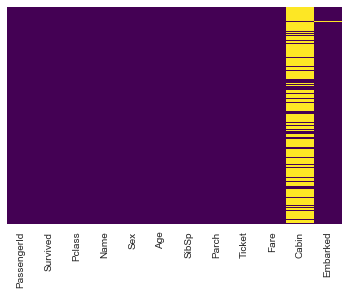

In [16]:
#Plotting heatmap to see how it looks after filling in the values for age
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [17]:
#Dropping Cabin as there are too many missing values

train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
#Dropping the missing values in embark
train.dropna(inplace = True)

In [19]:
train.info()
#There were two Nan values in Embark so 2 rows were dropped. Now data from 991 has come down to 889

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
#Creating dummies for sex column. Dropping First row to avoid Multicollinearity
sex = pd.get_dummies(train['Sex'],drop_first = True)

In [21]:
#Creating dummies for embarked column. Dropping First row to avoid Multicollinearity
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [22]:
#Dropping the categorical columns
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [23]:
train = pd.concat([train,sex,embarked],axis = 1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
#Fitting the logistic regression model

X = train.drop('Survived',axis=1)
y = train['Survived']

In [26]:
from sklearn.model_selection import train_test_split
X_train, Xtest, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
prediction = logmodel.predict(Xtest)

In [29]:
#Moving to evaluation as model has been created and predicted

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [55]:
test = pd.read_csv("~/Downloads/ML Practice/Logistic-Regression/titanic_test.csv")

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


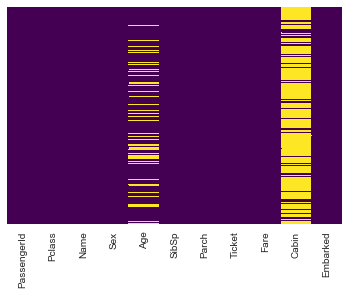

In [57]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
test.drop("Cabin",axis=1,inplace=True)

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


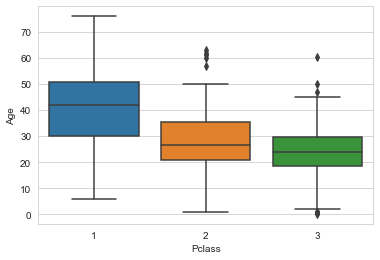

In [60]:
sns.boxplot(x='Pclass',y='Age',data=test)

In [61]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        if Pclass == 2:
            return 25
        if Pclass == 3:
            return 23
    else:
        return Age
    
test['Age'] = test[['Age','Pclass']].apply(fill_age,axis=1)

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [65]:
test.fillna(test['Fare'].mean(),inplace=True)

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [67]:
sex = pd.get_dummies(test['Sex'],drop_first = True)
embarked = pd.get_dummies(test['Embarked'],drop_first = True)

In [68]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [70]:
test = pd.concat([test,sex,embarked],axis = 1)

In [71]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [72]:
test_predict = logmodel.predict(test)

In [73]:
test_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
data={'PassengerId':test['PassengerId'],'Survived':test_predict}

In [75]:
df = pd.DataFrame(data)

In [76]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [77]:
df.to_csv(r'predictions.csv',index=False)